<a href="https://colab.research.google.com/github/Riiishaab/MLEE/blob/main/MLEE_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Classification with MLP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
from tensorflow.keras.utils import to_categorical

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=15, random_state=42)
y_one_hot = to_categorical(y, num_classes=3)

# Split into train, validation, test
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
def build_mlp(input_dim, output_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(output_dim, activation='softmax')
    ])
    return model

optimizers = {
    "SGD": SGD(learning_rate=0.05),
    "SGD with Momentum": SGD(learning_rate=0.05, momentum=0.9),
    "SGD with Nesterov": SGD(learning_rate=0.05, momentum=0.9, nesterov=True),
    "Adagrad": Adagrad(learning_rate=0.05),
    "RMSProp": RMSprop(learning_rate=0.05),
    "Adam": Adam(learning_rate=0.05),
}

In [ ]:

history_dict = {}
metrics = {}

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name}...")
    model = build_mlp(X_train.shape[1], y_train.shape[1])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_data=(X_val, y_val))
    history_dict[opt_name] = history

    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    report = classification_report(y_true, y_pred_labels, output_dict=True)
    cm = confusion_matrix(y_true, y_pred_labels)

    metrics[opt_name] = {
        "confusion_matrix": cm,
        "classification_report": report,
        "accuracy": report["accuracy"],
        "precision": np.mean([report[str(i)]["precision"] for i in range(3)]),
        "recall": np.mean([report[str(i)]["recall"] for i in range(3)]),
        "f1-score": np.mean([report[str(i)]["f1-score"] for i in range(3)])
    }



Training with SGD...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step

Training with SGD with Momentum...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Training with SGD with Nesterov...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with Adagrad...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Training with RMSProp...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step

Training with Adam...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


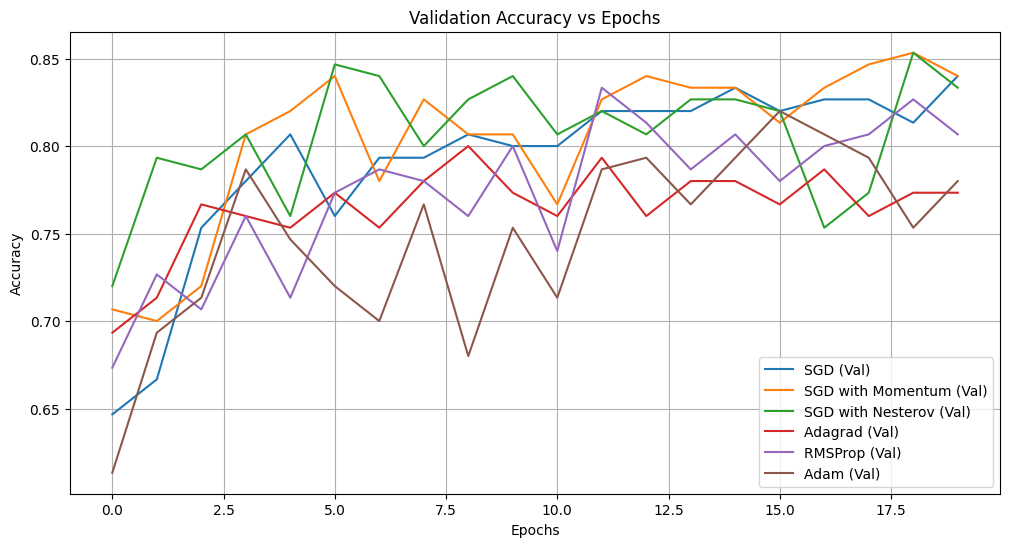


Optimizer: SGD
Confusion Matrix:
 [[42  4 10]
 [ 5 41  4]
 [ 4  8 32]]
Accuracy: 0.7666666666666667
Precision: 0.764255497112709
Recall: 0.7657575757575756
F1-Score: 0.7640914483124809

Optimizer: SGD with Momentum
Confusion Matrix:
 [[44  6  6]
 [ 3 42  5]
 [ 5  7 32]]
Accuracy: 0.7866666666666666
Precision: 0.7846587521006126
Recall: 0.7843290043290043
F1-Score: 0.7834823329076203

Optimizer: SGD with Nesterov
Confusion Matrix:
 [[44  5  7]
 [ 3 36 11]
 [ 3  6 35]]
Accuracy: 0.7666666666666667
Precision: 0.7687782684330257
Recall: 0.7670562770562771
F1-Score: 0.764702068339493

Optimizer: Adagrad
Confusion Matrix:
 [[45  6  5]
 [ 3 41  6]
 [ 2  7 35]]
Accuracy: 0.8066666666666666
Precision: 0.8067096081588835
Recall: 0.8063419913419914
F1-Score: 0.8050986400043003

Optimizer: RMSProp
Confusion Matrix:
 [[42  9  5]
 [ 5 39  6]
 [ 2  6 36]]
Accuracy: 0.78
Precision: 0.7817741753911966
Recall: 0.7827272727272727
F1-Score: 0.7804029304029304

Optimizer: Adam
Confusion Matrix:
 [[40  6 1

In [ ]:
plt.figure(figsize=(12, 6))
for opt_name, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=f"{opt_name} (Val)")
plt.title("Validation Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

for opt_name, data in metrics.items():
    print(f"\nOptimizer: {opt_name}")
    print("Confusion Matrix:\n", data["confusion_matrix"])
    print("Accuracy:", data["accuracy"])
    print("Precision:", data["precision"])
    print("Recall:", data["recall"])
    print("F1-Score:", data["f1-score"])


# Regression on Diabetes Dataset

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = load_diabetes()
X = data.data
y = data.target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_norm = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_norm = scaler_y.transform(y_val.reshape(-1, 1)).flatten()
y_test_norm = scaler_y.transform(y_test.reshape(-1, 1)).flatten()


In [ ]:
# Model builder
def build_regression_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='sigmoid'),
        Dense(32, activation='sigmoid'),
        Dense(1)  # Linear output for regression
    ])
    return model

# Optimizers to compare
optimizers = {
    "SGD": SGD(learning_rate=0.05),
    "SGD with Momentum": SGD(learning_rate=0.05, momentum=0.9),
    "SGD with Nesterov": SGD(learning_rate=0.05, momentum=0.9, nesterov=True),
    "Adagrad": Adagrad(learning_rate=0.05),
    "RMSProp": RMSprop(learning_rate=0.05),
    "Adam": Adam(learning_rate=0.05)
}


In [ ]:
reg_metrics = {}
reg_history = {}

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer...")
    model = build_regression_model(X_train.shape[1])
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    history = model.fit(
        X_train, y_train_norm,
        epochs=20, batch_size=32,
        validation_data=(X_val, y_val_norm),
        verbose=0
    )

    reg_history[opt_name] = history.history

    # Prediction and denormalization
    y_pred_norm = model.predict(X_test).flatten()
    y_pred = scaler_y.inverse_transform(y_pred_norm.reshape(-1, 1)).flatten()
    y_true = scaler_y.inverse_transform(y_test_norm.reshape(-1, 1)).flatten()

    # Evaluation
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    reg_metrics[opt_name] = {"MSE": mse, "R2": r2}



Training with SGD optimizer...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step

Training with SGD with Momentum optimizer...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

Training with SGD with Nesterov optimizer...
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step

Training with Adagrad optimizer...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

Training with RMSProp optimizer...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Training with Adam optimizer...
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


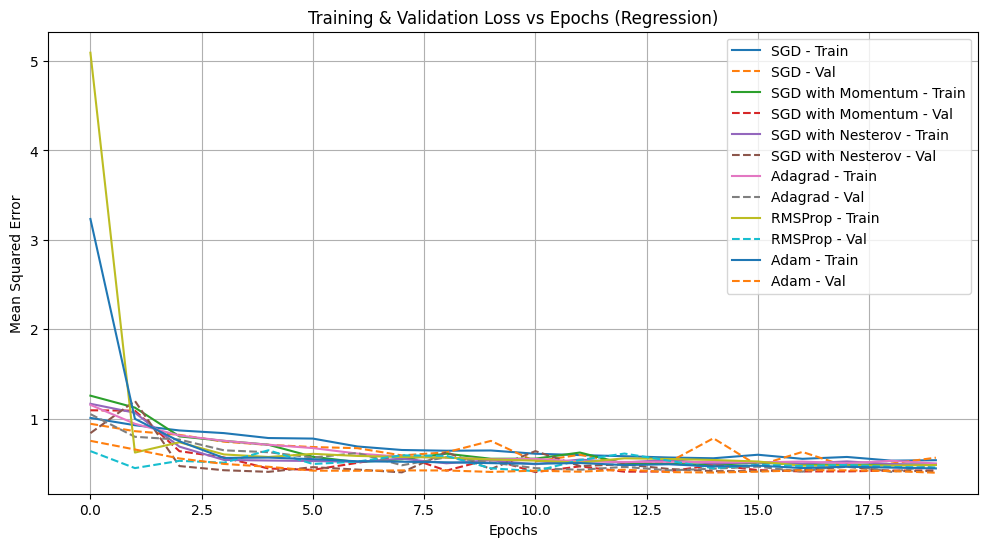

In [ ]:
plt.figure(figsize=(12, 6))
for opt_name, history in reg_history.items():
    plt.plot(history['loss'], label=f'{opt_name} - Train')
    plt.plot(history['val_loss'], linestyle='--', label=f'{opt_name} - Val')
plt.title("Training & Validation Loss vs Epochs (Regression)")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Final Evaluation Metrics:\n")
for opt_name, metrics in reg_metrics.items():
    print(f"{opt_name} Optimizer:")
    print(f"  Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"  R² Score: {metrics['R2']:.4f}\n")


Final Evaluation Metrics:

SGD Optimizer:
  Mean Squared Error: 4427.8188
  R² Score: 0.2345

SGD with Momentum Optimizer:
  Mean Squared Error: 3545.5525
  R² Score: 0.3871

SGD with Nesterov Optimizer:
  Mean Squared Error: 3176.3337
  R² Score: 0.4509

Adagrad Optimizer:
  Mean Squared Error: 4023.2477
  R² Score: 0.3045

RMSProp Optimizer:
  Mean Squared Error: 3139.3345
  R² Score: 0.4573

Adam Optimizer:
  Mean Squared Error: 3060.5663
  R² Score: 0.4709

